In [5]:
import numpy as np
from matplotlib import pyplot as plt
import utils_notebook

# LOADING OF THE DATA USED FOR THE GRAPHS AND COMPUTATIONS
targets, detections, segmentations = utils_notebook.load_predictions("/path/to/saved/results/")

## Draw the subplots for the predictions

This code draws the predictions in terms of detection and segmentation for the 3 classes on three subplots

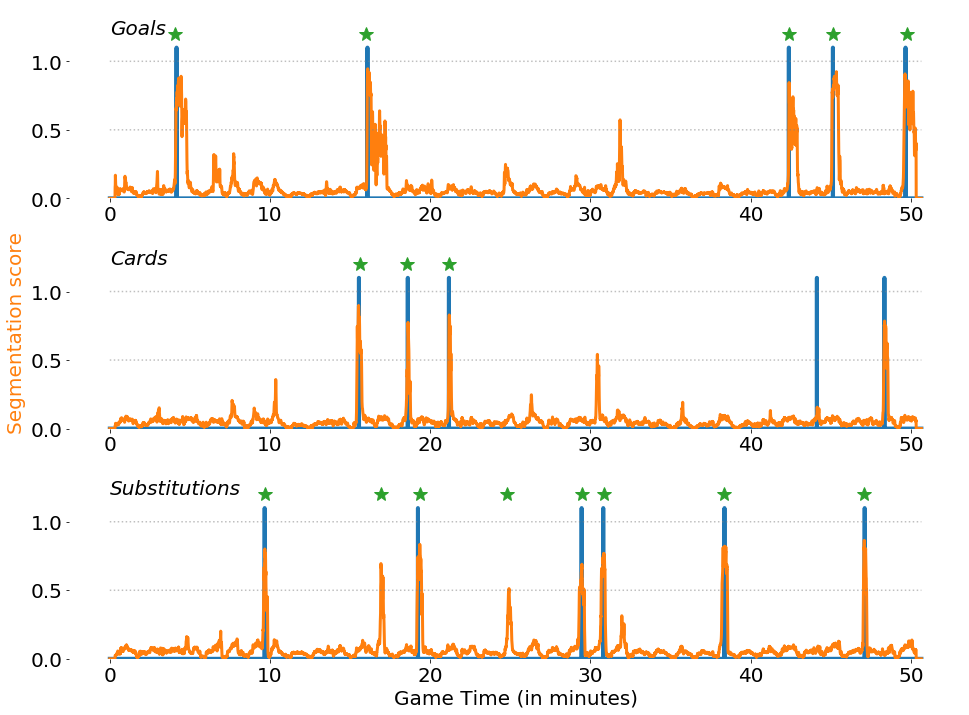

In [6]:
# Choosing on which game
game_index = 69

# Loading the data
segmentation = np.copy(segmentations[game_index])
target = np.copy(targets[game_index])*1.1
detection = np.copy(detections[game_index])
detection = np.where(detection >= 0.34, 1.2, -1)
segmentation[0:40] = 0
segmentation[-40:] = 0

x = np.arange(segmentation.shape[0])/120

# Drawing the graph
plt.figure(figsize=(16,12))
ax_1 = plt.subplot(311)
ax_1.spines["top"].set_visible(False)
ax_1.spines["bottom"].set_visible(False)
ax_1.spines["right"].set_visible(False)
ax_1.spines["left"].set_visible(False)
ax_1.get_xaxis().tick_bottom()
ax_1.get_yaxis().tick_left()
ax_1.set_ylim(0,1.4)
plt.yticks([0,0.5,1], fontsize=20)
plt.xticks([0,10,20,30,40,50],fontsize=20)
ax_1.text(0,1.2,"Goals", fontsize=20, fontstyle="italic")

ax_1.plot(x, target[:,0], linewidth=4)
ax_1.plot(x, segmentation[:,0], linewidth=3)
ax_1.plot(x, detection[:,0], '*', markersize=15)
ax_1.plot(x, (np.zeros(segmentation.shape[0])+1), ':', color="grey", alpha = 0.5)
ax_1.plot(x, (np.zeros(segmentation.shape[0])+0.5), ':', color="grey", alpha = 0.5)

ax_2 = plt.subplot(312)
ax_2.spines["top"].set_visible(False)
ax_2.spines["bottom"].set_visible(False)
ax_2.spines["right"].set_visible(False)
ax_2.spines["left"].set_visible(False)
ax_2.get_xaxis().tick_bottom()
ax_2.get_yaxis().tick_left()
ax_2.set_ylim(0,1.4)
plt.yticks([0,0.5,1], fontsize=20)
plt.xticks([0,10,20,30,40,50],fontsize=20)
ax_2.set_ylabel("Segmentation score", fontsize=20, color="tab:orange")
ax_2.text(0,1.2,"Cards", fontsize=20, fontstyle="italic")

ax_2.plot(x, target[:,1], linewidth=4)
ax_2.plot(x, segmentation[:,1], linewidth=3)
ax_2.plot(x, detection[:,1], '*', markersize=15)
ax_2.plot(x, (np.zeros(segmentation.shape[0])+1), ':', color="grey", alpha = 0.5)
ax_2.plot(x, (np.zeros(segmentation.shape[0])+0.5), ':', color="grey", alpha = 0.5)


ax_3 = plt.subplot(313)
ax_3.spines["top"].set_visible(False)
ax_3.spines["bottom"].set_visible(False)
ax_3.spines["right"].set_visible(False)
ax_3.spines["left"].set_visible(False)
ax_3.get_xaxis().tick_bottom()
ax_3.get_yaxis().tick_left()
ax_3.set_ylim(0,1.4)
plt.yticks([0,0.5,1], fontsize=20)
plt.xticks([0,10,20,30,40,50],fontsize=20)
ax_3.text(0,1.2,"Substitutions", fontsize=20, fontstyle="italic")

ax_3.plot(x, target[:,2], linewidth=4)
ax_3.plot(x, segmentation[:,2], linewidth=3)
ax_3.plot(x, detection[:,2], '*', markersize=15)
ax_3.plot(x, (np.zeros(segmentation.shape[0])+1), ':', color="grey", alpha = 0.5)
ax_3.plot(x, (np.zeros(segmentation.shape[0])+0.5), ':', color="grey", alpha = 0.5)
ax_3.set_xlabel("Game Time (in minutes)", fontsize=20)
plt.show()

## Metrics on the count of events

Metrics that count the events in terms of TP, FP, FN per class. The derived metrics are the precision, recall and F1 score which are computed for several tolerances.

First compute the values and then plot them

In [7]:
TP, FP, FN = utils_notebook.countEvents(targets, detections, False)

100%|██████████| 12/12 [01:06<00:00,  5.58s/it]
12it [00:00, 36.58it/s]


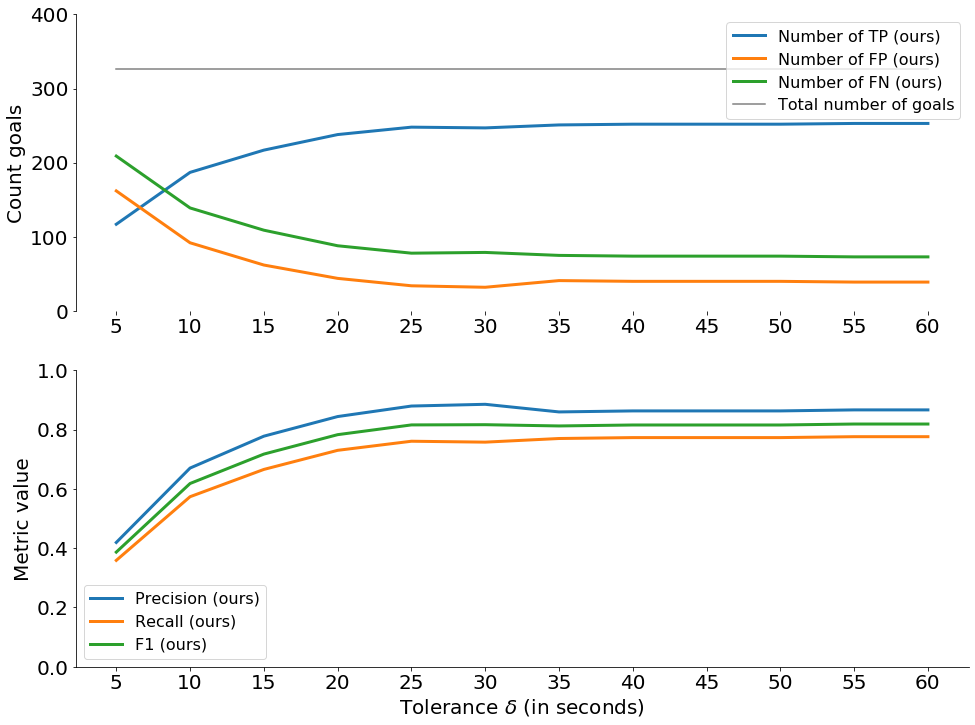

In [8]:
x = np.arange(TP.shape[0])*5+5
event=0
event_name = ["goals", "cards", "substitutions"]
colors = ["tab:blue", "tab:orange", "tab:green", "grey"]
# Drawing the graph
plt.figure(figsize=(16,12))

ax_1 = plt.subplot(211)
ax_1.spines["top"].set_visible(False)
ax_1.spines["bottom"].set_visible(False)
ax_1.spines["right"].set_visible(False)
ax_1.get_xaxis().tick_bottom()
ax_1.get_yaxis().tick_left()

ax_1.plot(x, TP[:,event], linewidth=3, color = colors[0], label="Number of TP (ours)")
ax_1.plot(x, FP[:,event], linewidth=3, color = colors[1], label="Number of FP (ours)")
ax_1.plot(x, FN[:,event], linewidth=3, color = colors[2], label="Number of FN (ours)")
ax_1.plot(x, (TP[:,event]+FN[:,event]), color = colors[3], alpha = 1.0, label="Total number of " + event_name[event] )
ax_1.set_ylabel("Count " + event_name[event], fontsize=20)
ax_1.legend(fontsize=16)

plt.yticks([0,100,200,300,400],fontsize=20)
plt.xticks([5,10,15,20,25,30,35,40,45,50,55,60],fontsize=20)

ax_2 = plt.subplot(212)
ax_2.spines["top"].set_visible(False)
ax_2.spines["right"].set_visible(False)
ax_2.get_xaxis().tick_bottom()
ax_2.get_yaxis().tick_left()
ax_2.set_ylim(0,1)
ax_2.set_ylabel("Metric value", fontsize=20)

ax_2.plot(x, TP[:,event]/(TP[:,event]+FP[:,event]), linewidth=3, color = colors[0], label="Precision (ours)")
ax_2.plot(x, TP[:,event]/(TP[:,event]+FN[:,event]), linewidth=3, color = colors[1], label="Recall (ours)")
ax_2.plot(x, 2*TP[:,event]/(2*TP[:,event]+FP[:,event]+FN[:,event]), color = colors[2], linewidth=3, label="F1 (ours)")
ax_2.set_xlabel("Tolerance $\delta$ (in seconds)", fontsize=20)
ax_2.legend(fontsize=16)

plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.xticks([5,10,15,20,25,30,35,40,45,50,55,60],fontsize=20)

plt.show()